# Stock price prediction using Machine Learning

In [ ]:
#pip install yfinance

# Importing needful libraries

In [2]:
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Importing data

In [4]:
df=yf.download("AAPL",start="2010-01-01",end="2019-12-31")

[*********************100%***********************]  1 of 1 completed


In [5]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.496294,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.507524,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.404013,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.392176,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.434673,447610800


# Setting data

In [6]:
df=df["Close"].to_frame()
df.head()

,Close
Date,
2010-01-04,7.643214
2010-01-05,7.656429
2010-01-06,7.534643
2010-01-07,7.520714
2010-01-08,7.570714


# Sliding window

In [8]:
df["Close in 10 changes"]=df["Close"].shift(-10)

In [9]:
df.tail(20)

,Close,Close in 10 changes
Date,,
2019-12-02,66.040001,69.964996
2019-12-03,64.862503,70.102501
2019-12-04,65.434998,69.934998
2019-12-05,66.394997,70.004997
2019-12-06,67.677498,69.860001
2019-12-09,66.730003,71.000000
2019-12-10,67.120003,71.067497
2019-12-11,67.692497,72.477501
2019-12-12,67.864998,72.449997


In [10]:
dfc =df.iloc[:-10,:]

In [16]:
dfc.head()

,Close,Close in 10 changes
Date,,
2010-01-04,7.643214,7.680000
2010-01-05,7.656429,7.561786
2010-01-06,7.534643,7.431071
2010-01-07,7.520714,7.062500
2010-01-08,7.570714,7.252500


In [17]:
df.reset_index(inplace=True)

In [18]:
df.head()

,Date,Close,Close in 10 changes
0,2010-01-04,7.643214,7.680000
1,2010-01-05,7.656429,7.561786
2,2010-01-06,7.534643,7.431071
3,2010-01-07,7.520714,7.062500
4,2010-01-08,7.570714,7.252500


# Machine Learning

In [22]:
x=dfc.iloc[:,0].values.reshape(dfc.shape[0],1)
x

array([[ 7.64321423],
       [ 7.65642881],
       [ 7.53464317],
       ...,
       [67.69249725],
       [67.86499786],
       [68.78749847]])

In [23]:
y=dfc.iloc[:,1].values

In [25]:
y

array([ 7.67999983,  7.56178617,  7.4310708 , ..., 72.47750092,
       72.44999695, 72.87999725])

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [29]:
rf =RandomForestRegressor(n_estimators=500)
rf.fit(x_train,y_train)
y_pred =rf.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

1.793004916208099

# Forecasting

In [35]:
y_act_10=dfc.iloc[-0:,:]["Close in 10 changes"].values
y_act_10

array([ 7.67999983,  7.56178617,  7.4310708 , ..., 72.47750092,
       72.44999695, 72.87999725])

In [36]:
y_pred_10=rf.predict(dfc.iloc[-10:,:]["Close"].values.reshape(10,1))

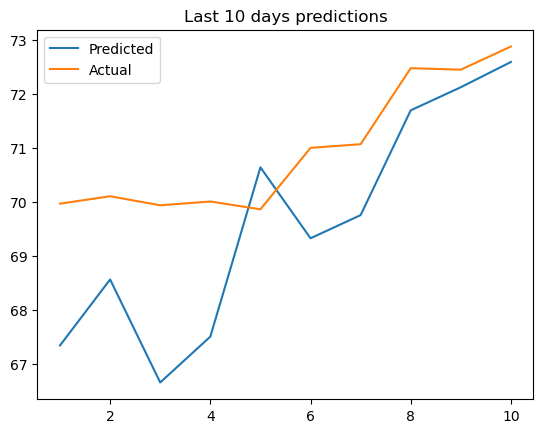

In [39]:
import matplotlib.pyplot as plt

# Assuming y_act_10 contains the actual values for the last 10 days
y_act_10 = dfc.iloc[-10:, :]["Close in 10 changes"].values

# Assuming y_pred_10 contains the predicted values for the next 10 days
y_pred_10 = rf.predict(dfc.iloc[-10:, :]["Close"].values.reshape(-1, 1))

plt.plot(range(1, 11), y_pred_10)
plt.plot(range(1, 11), y_act_10)
plt.legend(["Predicted", "Actual"])
plt.title("Last 10 days predictions")
plt.show()
